(-0.5, 2047.5, 1023.5, -0.5)

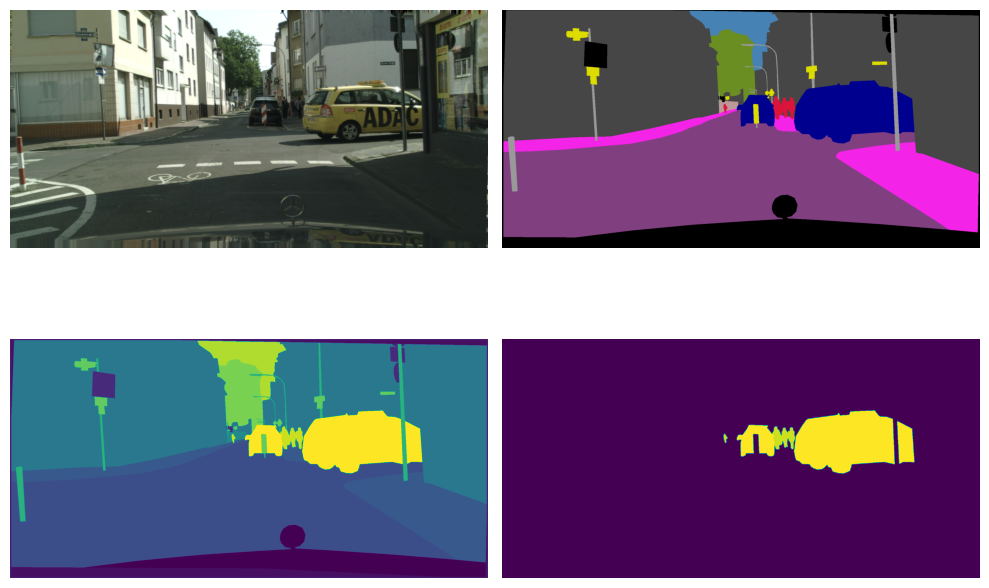

In [ ]:
from torch.utils.data import DataLoader
import torchvision.transforms as TF

import matplotlib.pyplot as plt

from datasets.cityscapes import CityScapes
from utils import tensorToImage

transform = TF.Compose([
    TF.ToTensor(),
    TF.Normalize(mean=[0.485, 0.456, 0.406], 
                 std=[0.229, 0.224, 0.225])
])

data = CityScapes("/content", transform=transform)
dataloader = DataLoader(data, batch_size=8, shuffle=True)

i = 0
img, color, label, instance = next(iter(dataloader))

fig, ax = plt.subplots(2,2, figsize=(10,10), layout="tight")

ax[0, 0].imshow(tensorToImage(img[i]))
ax[0,0].axis('off')

ax[0,1].imshow(tensorToImage(color[i]))
ax[0,1].axis('off')

ax[1,0].imshow(label[i])
ax[1,0].axis('off')
ax[1,1].imshow(instance[i])
ax[1,1].axis('off')

None